# ++++++++++++++++++++++++++++++
# Prudential Life Insurance Assessment
# ++++++++++++++++++++++++++++++

## Part 3: Inspect and Test the Tuned GBM Model
## ------------------------------------------------------

Author: <a href='mailto:rory_creedon@swissre.com'>Rory Creedon</a><br/>
Date: October 2017 <br/>
Purpose: To inspect and test the gbm model from part 2

### Loading Objects

In [1]:
#imports
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#initialize h2o cluster
h2o.init(nthreads=-1, strict_version_check=True)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,08 secs
H2O cluster version:,3.15.0.4050
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_ec2_user_4ctnpw
H2O cluster total nodes:,1
H2O cluster free memory:,26.52 Gb
H2O cluster total cores:,64
H2O cluster allowed cores:,64
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
#load the data sets
path = "/home/ec2-user/finalGaProject/h2oData/{}"
train60 = h2o.load_dataset(path.format("train60.h20"))
train80 = h2o.load_dataset(path.format("train80.h20"))
valid = h2o.load_dataset(path.format("valid.h20"))
test = h2o.load_dataset(path.format("test.h20"))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
#load the score history of the model
#look at the scoring history for best performing model
scoreHistory = pickle.load(open("tuneGridScoreHistory.pkl", "rb"))
scoreHist = scoreHistory['Grid_GBM_py_65_sid_be2c_model_python_1507067122023_1_model_29']

In [5]:
#load the model itself
gbm = h2o.load_model("/home/ec2-user/finalGaProject/Grid_GBM_py_65_sid_be2c_model_python_1507067122023_1_model_29")

---

### Inspect the Model

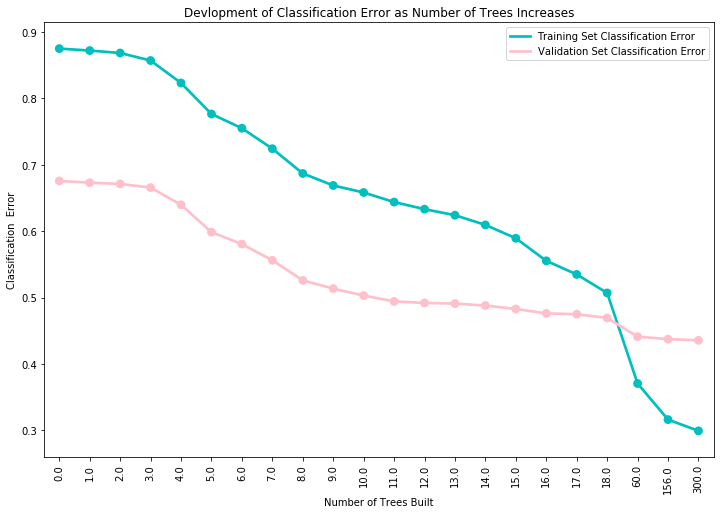

In [6]:
#get data from the scoreHist
trees = scoreHist['number_of_trees']
tScore = scoreHist['training_classification_error']
vScore = scoreHist['validation_classification_error']

#plot the classification error
fig, ax = plt.subplots()
sns.pointplot(x = trees, y=tScore, ax=ax, color = 'c')
sns.pointplot(x = trees, y=vScore, ax=ax, color='pink')
legend_labels = ["Training Set Classification Error",
                 "Validation Set Classification Error"]
plt.xticks(rotation=90)
plt.xlabel("Number of Trees Built")
plt.ylabel("Classification  Error")
plt.title("Devlopment of Classification Error as Number of Trees Increases")
ax.legend(handles = ax.lines[::23], labels = legend_labels)
plt.gcf().set_size_inches(12, 8)

Im not totally clear how the classification error differs from the mean_per_class_error

One thing that is concerning me slightly is that this has reached the maximum value of `ntrees` that I set. I set it at 300 intially based on my previous models. However, I wanted to set it at 1000 for the final tuning. I do not have time to re-run the full tuning, but as a next step I can use this model as a checkpoint and re-run with the same parameters but with more trees. 

In [7]:
#params_list = []
#for key, value in gbm.params.items():
#    params_list.append(str(key)+" = "+str(value['actual']))
#
#params_dict = {val.split('=')[0].strip() : val.split('=')[1].strip() for val in params_list[1:]}
#
#finalDict = {}
#for key, val in params_dict.items():
#    try:
#        finalDict[key] = eval(val)
#    except:
#        finalDict[key] = val
#
#finalDict['ntrees'] = 10000
#del finalDict['response_column']
#
#predictors = train60.columns
#del predictors[0]
#del predictors[-4]
#response = 'Response'
#
#train60['Response'] = train60['Response'].asfactor()
#valid['Response'] = valid['Response'].asfactor()
#
#moreTrees = H2OGradientBoostingEstimator(**finalDict)
#moreTrees.train(x = predictors, y = response, training_frame=train60, validation_frame=valid)

The results of the above did not improve, so I stick with the original best mdoel. 

The parameters of the winning model were as follows (from the above commented code)

`['training_frame = None',
 'validation_frame = None',
 'nfolds = 0',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 0',
 'fold_assignment = AUTO',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Response', 'is_member_of_frames': None}",
 "ignored_columns = ['Id']",
 'ignore_const_cols = True',
 'offset_column = None',
 'weights_column = None',
 'balance_classes = True',
 'class_sampling_factors = None',
 'max_after_balance_size = 5.0',
 'max_confusion_matrix_size = 20',
 'max_hit_ratio_k = 0',
 'ntrees = 10000',
 'max_depth = 5',
 'min_rows = 10.0',
 'nbins = 32',
 'nbins_top_level = 1024',
 'nbins_cats = 256',
 'r2_stopping = 1.7976931348623157e+308',
 'stopping_rounds = 3',
 'stopping_metric = mean_per_class_error',
 'stopping_tolerance = 0.001',
 'max_runtime_secs = 300.0',
 'seed = 20171958',
 'build_tree_one_node = False',
 'learn_rate = 0.1',
 'learn_rate_annealing = 0.99',
 'distribution = multinomial',
 'quantile_alpha = 0.5',
 'tweedie_power = 1.5',
 'huber_alpha = 0.9',
 'checkpoint = None',
 'sample_rate = 0.85',
 'sample_rate_per_class = None',
 'col_sample_rate = 0.7',
 'col_sample_rate_change_per_level = 1.0',
 'col_sample_rate_per_tree = 0.5',
 'min_split_improvement = 1e-07',
 'histogram_type = AUTO',
 'max_abs_leafnode_pred = 1.7976931348623157e+308',
 'pred_noise_bandwidth = 0.0',
 'categorical_encoding = AUTO',
 'calibrate_model = False',
 'calibration_frame = None']`
 
 
 Interestingly the learn rate was large as in previous iterations at 0.1. Also the sample rates were low, which perhaps reflects the potential for overfitting in the untuned model. 

Now lets see how we did on the scores:

In [8]:
print("Train mean per class error: ", gbm.mean_per_class_error())
print("Train mean per class error: ", gbm.mean_per_class_error(valid = True))
print()
print("Training root mean squared error: ", gbm.rmse())
print("Training root mean squared error: ", gbm.rmse(valid=True))

Train mean per class error:  0.2992520893570521
Train mean per class error:  0.5251082117448248

Training root mean squared error:  0.5682496105204872
Training root mean squared error:  0.643811281822042


The mean per class error on the validation set is 0.52, so the mean per class accuracy is 0.48. If we were to allocate by chance the accuracy would be 1/8, so this is a substantial improvement from guessing. 

Furthermore, for rate classes such as these, the best thing if one is not right, is not to be terribly far away from the right answer. So a 1 predicted as an 8 is a big problem, but a 3 predicted as a 4 is not so problematic. The root mean square error on the validation set is 0.64, which if we round up to 1, means the average prediction error is only 1 rate class. This could prove useful. Note this assumes that the response variable is ordered as the values would suggest.

How well does the model do on the test set?

In [9]:
#get test mean per class validation error
testPerformance = gbm.model_performance(test)
print("Test mean per class error: ", testPerformance.mean_per_class_error())

Test mean per class error:  0.5384118148844905


In [10]:
#get predicitons
predictions = gbm.predict(test)
predictions.head(10)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p1,p2,p3,p4,p5,p6,p7,p8
8,0.0118826,0.0151818,0.000289141,0.00155338,0.00864116,0.0345796,0.0367843,0.891088
7,0.0720332,0.0837744,0.000478625,0.00607248,0.0578581,0.300314,0.420249,0.0592208
8,0.0651307,0.0515005,0.000552814,0.00254709,0.0174467,0.0669472,0.22008,0.575795
8,0.0117225,0.0159015,0.000193427,0.000671875,0.00585456,0.0500097,0.0480384,0.867608
6,0.0597916,0.137811,0.00823515,0.00200075,0.267915,0.347808,0.102265,0.0741737
7,0.113727,0.0637949,0.000916917,0.00152562,0.0200536,0.31992,0.454132,0.025931
7,0.093211,0.0987797,0.00457221,0.00603299,0.0496891,0.167573,0.444479,0.135662
7,0.0715527,0.109742,0.00381813,0.00963156,0.0253405,0.253318,0.392008,0.134589
2,0.308612,0.487482,0.000497725,0.000334539,0.0313093,0.15287,0.0122846,0.00660954
6,0.0721768,0.156576,0.000211043,0.000669421,0.0271292,0.34015,0.293402,0.109686


The predictions show the raw predictions in the first columns and the probabilities of that observation being in any of the classes. Could a threshold be set here to only say a successful prediction has been made if it is passed?

In [11]:
#see what the mean probability was for each value of prediction
pdf = predictions.as_data_frame()
for x in range(1, 9):
    print("Prediction {}:".format(x), pdf[pdf['predict'] == x]['p{}'.format(x)].mean())

Prediction 1: 0.4768092870620065
Prediction 2: 0.48468456312478736
Prediction 3: 0.5183638348578306
Prediction 4: 0.5477408411473184
Prediction 5: 0.5703283078255106
Prediction 6: 0.5017740006565481
Prediction 7: 0.44302501423027657
Prediction 8: 0.6761906966696203


There is a lot more probability for those predicted 8. I wonder if this means it would be best to accept the prediction only if risk class 8 is the outcome. TBC.

In [12]:
#make a data frame from the confusion matrix. 
ciDF = testPerformance.confusion_matrix().as_data_frame()
ciDF['prediction'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ciDF = ciDF.drop(8).drop(['Error', 'Rate'], axis=1).set_index('prediction')
ciDF

,1,2,3,4,5,6,7,8
prediction,,,,,,,,
1,243.0,198.0,15.0,34.0,113.0,235.0,129.0,291.0
2,130.0,290.0,17.0,23.0,155.0,296.0,123.0,271.0
3,23.0,20.0,78.0,56.0,15.0,13.0,2.0,9.0
4,17.0,7.0,17.0,153.0,0.0,26.0,6.0,32.0
5,39.0,90.0,1.0,0.0,548.0,214.0,78.0,98.0
6,81.0,105.0,0.0,6.0,90.0,1129.0,283.0,497.0
7,29.0,27.0,0.0,2.0,18.0,312.0,639.0,574.0
8,21.0,12.0,0.0,1.0,9.0,168.0,193.0,3468.0


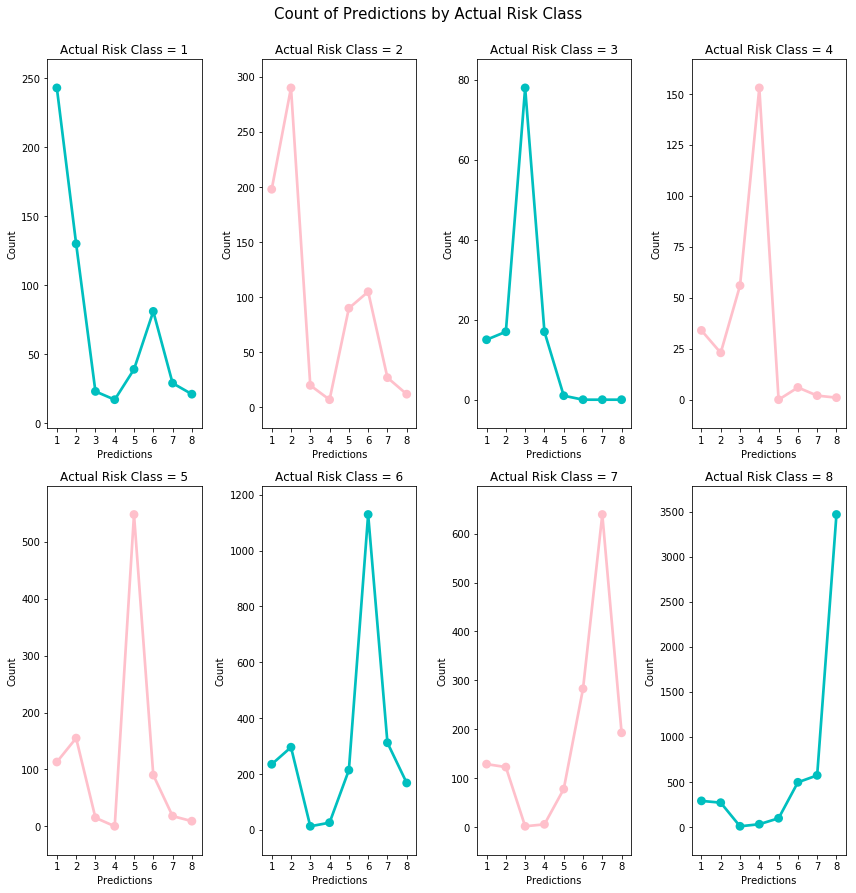

In [13]:
fig, [(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)] = plt.subplots(2, 4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
colors = ['c', 'pink', 'c', 'pink', 'pink', 'c','pink', 'c']

for x in range(1, 9):
    sns.pointplot(x = list(ciDF.index), y = ciDF[str(x)], ax=axes[x-1], color = colors[x-1])
    axes[x-1].set_title("Actual Risk Class = {}".format(x))
    axes[x-1].set_xlabel("Predictions")
    axes[x-1].set_ylabel("Count")
plt.gcf().set_size_inches(12, 12)
fig.tight_layout()
plt.suptitle("Count of Predictions by Actual Risk Class", size = 15, y = 1.03 )

The peaks represent the places where actual and predicted are the same. We then want to observe the predictions falling away as they get further from the true value. This is the way that insurers make money. We see the behavior in all but risk categories 1 and 2.

Lastly we can get a sense of how impotant each variable was. 

In [14]:
gbm.varimp()[:10]

[('Medical_History_15', 61214.50390625, 1.0, 0.2581582199608022),
 ('Family_Hist_3', 25733.4296875, 0.42038125028197143, 0.10852487527769022),
 ('Family_Hist_5', 22521.544921875, 0.367911907876714, 0.09497948323983513),
 ('BMI', 22199.10546875, 0.3626445376858387, 0.09361966832748417),
 ('Product_Info_4', 8978.0693359375, 0.1466657207528368, 0.037862961398820436),
 ('Medical_History_4',
  8136.12060546875,
  0.13291164815987427,
  0.03431223450100958),
 ('Wt', 8083.826171875, 0.13205736640870894, 0.03409169464478373),
 ('Medical_History_24',
  6472.38671875,
  0.10573289507765118,
  0.027295815984548694),
 ('product_Number',
  4793.46533203125,
  0.07830603902912357,
  0.020215347647939644),
 ('Ins_Age', 4077.82568359375, 0.0666153513199901, 0.01719730051883212)]

## Conclusion

Using a gradient boosting tree method I am able to predict 8 risk classes with a mean per class accuracy of 0.48. This is roughly 4 times better than chance. Moreover the behavior of the predicitons that are incorrect are not hugely loss making as the mean error is 0.64 i.e. less than one risk class away. There are very few cases where predicitons for a particular class are wildly wrong. 

This is extremely promising. One major limitation of this was not knowing what the fields mean. 

Next steps:
1. Get my own data set at work
2. Try the other H2o models
3. Try building computing capacity with GPUs for increased performance